In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
rain = pd.read_csv("austin_cleaned.csv")

In [3]:
rain

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.68,10.0,7.0,2.0,20.0,4.0,31.0,0.46
1,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.13,10.0,10.0,5.0,16.0,6.0,25.0,0.00
2,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.49,10.0,10.0,10.0,8.0,3.0,12.0,0.00
3,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.45,10.0,10.0,7.0,12.0,4.0,20.0,0.00
4,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.33,10.0,10.0,7.0,10.0,2.0,16.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,103,89,75,71.0,67.0,61.0,82.0,54.0,25.0,29.97,10.0,10.0,10.0,12.0,5.0,21.0,0.00
1315,105,91,76,71.0,64.0,55.0,87.0,54.0,20.0,29.90,10.0,10.0,10.0,14.0,5.0,20.0,0.00
1316,107,92,77,72.0,64.0,55.0,82.0,51.0,19.0,29.86,10.0,10.0,10.0,12.0,4.0,17.0,0.00
1317,106,93,79,70.0,68.0,63.0,69.0,48.0,27.0,29.91,10.0,10.0,10.0,13.0,4.0,20.0,0.00


<AxesSubplot:>

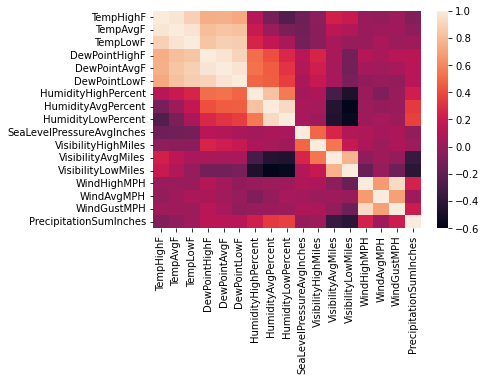

In [4]:
sns.heatmap(rain.corr())

In [11]:
len(rain[rain['PrecipitationSumInches'] == 0]) / len(rain) * 100

75.3601213040182

In [23]:
daysWithoutPrec = rain[rain['PrecipitationSumInches'] == 0].index

In [13]:
rain['PrecipitationSumInches'].corr(rain['TempAvgF'])

-0.020442457538988965

In [14]:
rain['PrecipitationSumInches'].corr(rain['DewPointAvgF'])

0.12703952814933983

In [15]:
rain['PrecipitationSumInches'].corr(rain['SeaLevelPressureAvgInches'])

-0.001953796615002974

In [27]:
rainWithout = rain.drop(daysWithoutPrec)

<AxesSubplot:>

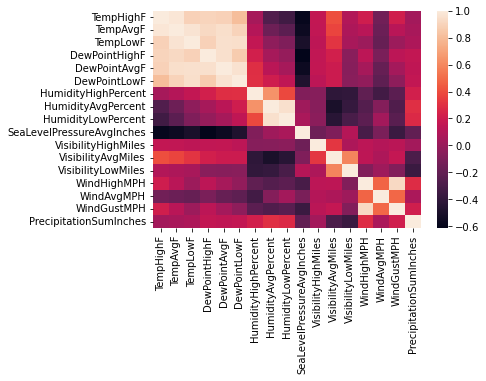

In [32]:
sns.heatmap(rainWithout.corr())

In [33]:
lm = LinearRegression()

In [35]:
x = rainWithout.drop(['PrecipitationSumInches'], axis = 1)
y= rainWithout['PrecipitationSumInches']

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = .3, random_state=0)

In [65]:
lm.fit(X_train, Y_train)

LinearRegression()

In [66]:
lm.intercept_

13.789821193497085

In [67]:
y_pred_test = lm.predict(X_test)
y_pred_train = lm.predict(X_train)

/Users/leeranfarin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PrecipitationSumInches'>

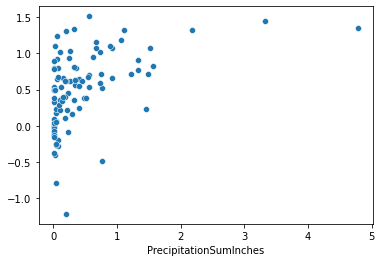

In [68]:
sns.scatterplot(Y_test, y_pred_test)

In [69]:
worst10 = abs(Y_test - y_pred_test).nlargest(10)

In [70]:
worst10

672    3.446187
336    1.888056
742    1.416185
519    1.251809
706    1.226655
348    1.178451
878    1.110456
830    1.069618
920    1.004954
483    0.941186
Name: PrecipitationSumInches, dtype: float64

In [71]:
worst10Indexes = list(worst10.index)

In [72]:
worst10Indexes

[672, 336, 742, 519, 706, 348, 878, 830, 920, 483]

In [73]:
worst = Y_test[worst10Indexes]

In [74]:
test = [Y_test.index.get_loc(x) for x in worst10Indexes]

/Users/leeranfarin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/leeranfarin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PrecipitationSumInches'>

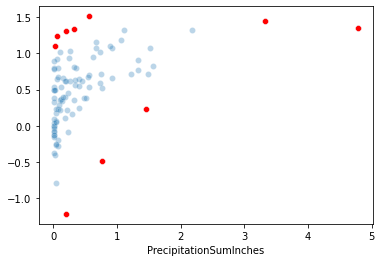

In [76]:
sns.scatterplot(Y_test, y_pred_test, alpha=.3)
sns.scatterplot(worst, y_pred_test[test], color='red')